<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None
             Sr No
count  3044.000000
mean   1522.500000
std     878.871435
min       1.000000
25%     761.750000
50%    1522.500000
75%    2283.250000
max    3044.000000


<ipython-input-7-7ebb8bf60d98>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City  Location'].fillna('Unknown', inplace=True)
<ipython-input-7-7ebb8bf60d98>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

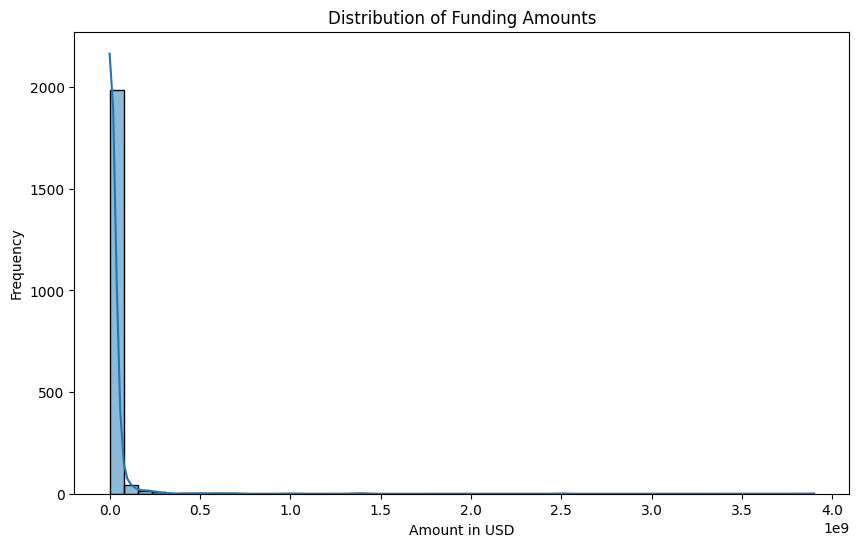

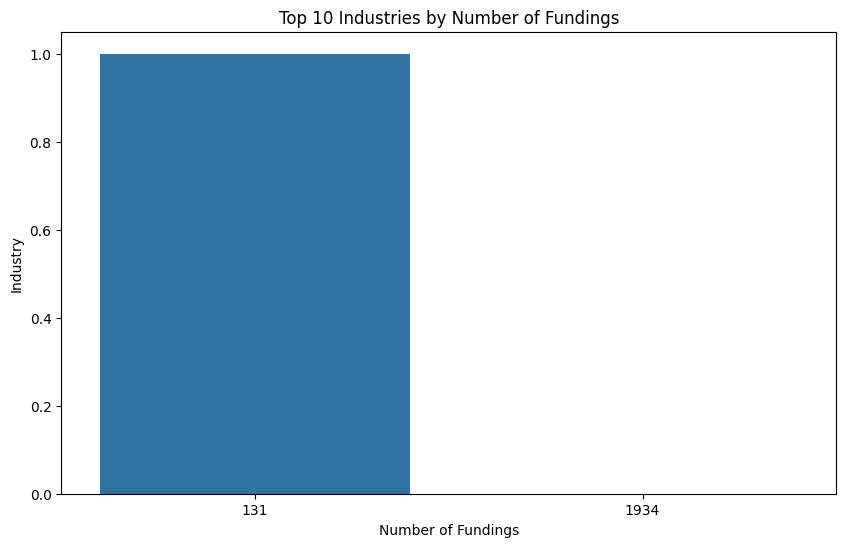

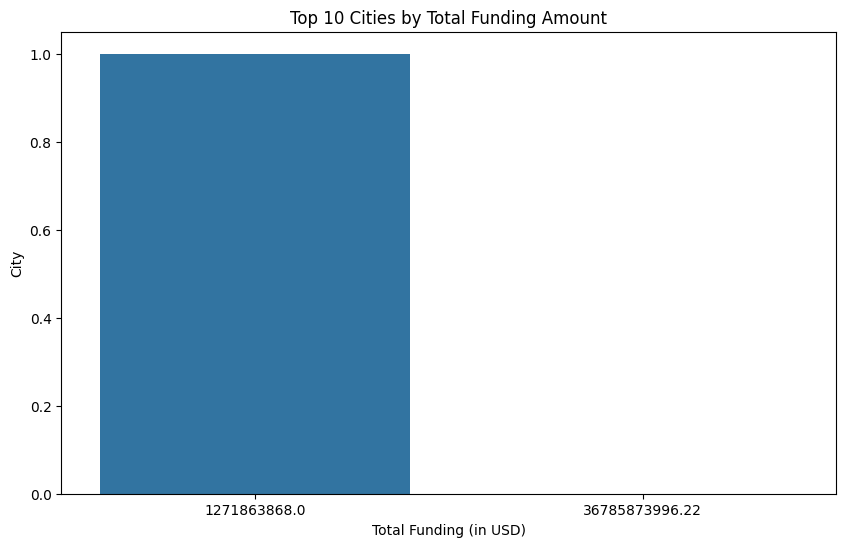

R² Score: -1.5300528243193494e+17


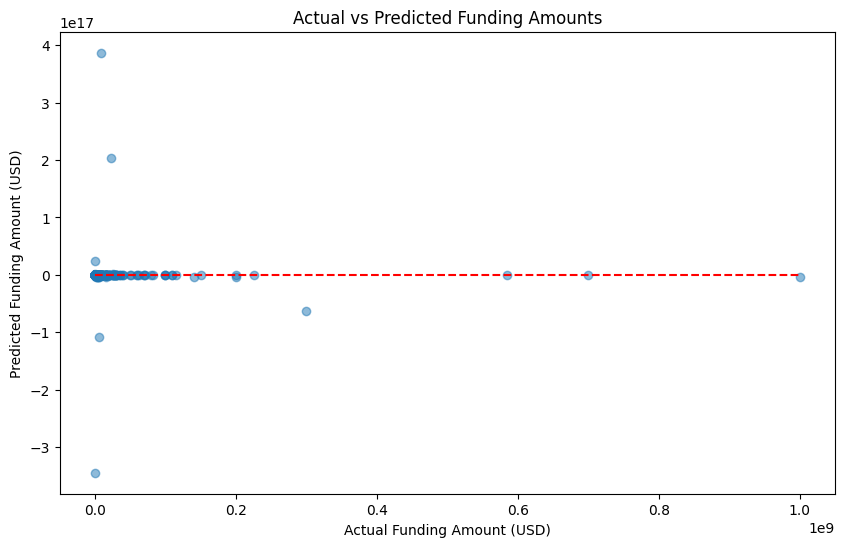

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
data_path = '/content/startup_funding.csv'  # Update path as necessary
df = pd.read_csv(data_path)

# Display basic information
print(df.info())
print(df.describe())

# Step 1: Data Preprocessing
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Convert 'Amount in USD' to numeric, handling missing values and non-numeric entries
df['Amount in USD'] = df['Amount in USD'].replace({'\$': '', ',': '', 'nan': None, 'NaN': None, 'undisclosed': None}, regex=True)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Handle missing values in 'Amount in USD' by dropping rows with NaN values
df = df.dropna(subset=['Amount in USD'])

# Fill missing values in other relevant columns with a placeholder or drop them
df['City  Location'].fillna('Unknown', inplace=True)
df['Industry Vertical'].fillna('Unknown', inplace=True)
df['InvestmentnType'].fillna('Unknown', inplace=True)

# Convert categorical columns to dummy variables using pd.get_dummies
df = pd.get_dummies(df, columns=['City  Location', 'Industry Vertical', 'InvestmentnType'], drop_first=True)

# Step 2: Exploratory Data Analysis (EDA)
# Plot the distribution of funding amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount in USD'], bins=50, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Amount in USD')
plt.ylabel('Frequency')
plt.show()

# Top 10 industries receiving funding
top_industries = df['Industry Vertical_Unknown'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_industries.values, y=top_industries.index)
plt.title('Top 10 Industries by Number of Fundings')
plt.xlabel('Number of Fundings')
plt.ylabel('Industry')
plt.show()

# Funding by City
funding_by_city = df.groupby('City  Location_Unknown')['Amount in USD'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=funding_by_city.values, y=funding_by_city.index)
plt.title('Top 10 Cities by Total Funding Amount')
plt.xlabel('Total Funding (in USD)')
plt.ylabel('City')
plt.show()

# Step 3: Preparing data for model
# Select features and target
X = df.drop(columns=['Amount in USD', 'Startup Name', 'Date dd/mm/yyyy', 'Investors Name', 'SubVertical', 'Remarks'])  # Drop unnecessary columns
y = df['Amount in USD']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Building
# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predictions and R² Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Funding Amounts')
plt.xlabel('Actual Funding Amount (USD)')
plt.ylabel('Predicted Funding Amount (USD)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line for reference
plt.show()
